In [1]:
import os
import torch
import torch.utils
import torch.utils.data
from tqdm import tqdm
import torch.optim as opt
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from modules.nice import NICE
from modules.coupling import intercalate

In [2]:
transform = [
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1)),
]
transform = transforms.Compose(transform)

BATCH_SIZE = 9
testset  = datasets.MNIST('./data', train = False, transform=transform, download=True)
testloader  = torch.utils.data.DataLoader(testset , batch_size=BATCH_SIZE, shuffle=False, pin_memory=True)


In [3]:
model = NICE(28 * 28, 1000, 5, 4)
model

NICE(
  (couplings): ModuleList(
    (0-3): 4 x AdditiveCouplingLayer(
      (m): Sequential(
        (0): Linear(in_features=392, out_features=1000, bias=True)
        (1): LeakyReLU(negative_slope=0.01)
        (2): Linear(in_features=1000, out_features=1000, bias=True)
        (3): LeakyReLU(negative_slope=0.01)
        (4): Linear(in_features=1000, out_features=1000, bias=True)
        (5): LeakyReLU(negative_slope=0.01)
        (6): Linear(in_features=1000, out_features=1000, bias=True)
        (7): LeakyReLU(negative_slope=0.01)
        (8): Linear(in_features=1000, out_features=1000, bias=True)
        (9): LeakyReLU(negative_slope=0.01)
        (10): Linear(in_features=1000, out_features=392, bias=True)
      )
    )
  )
  (scaling): ScalingLayer()
)

In [4]:
import matplotlib.pyplot as plt
import numpy as np

model = NICE(28 * 28, 1000, 5, 4)

In [5]:
imgs, _ = next(iter(testloader))

model:  ./models/nice-030.pt
log likehood:  1805.48681640625
tensor(3553.6599, grad_fn=<SumBackward0>)


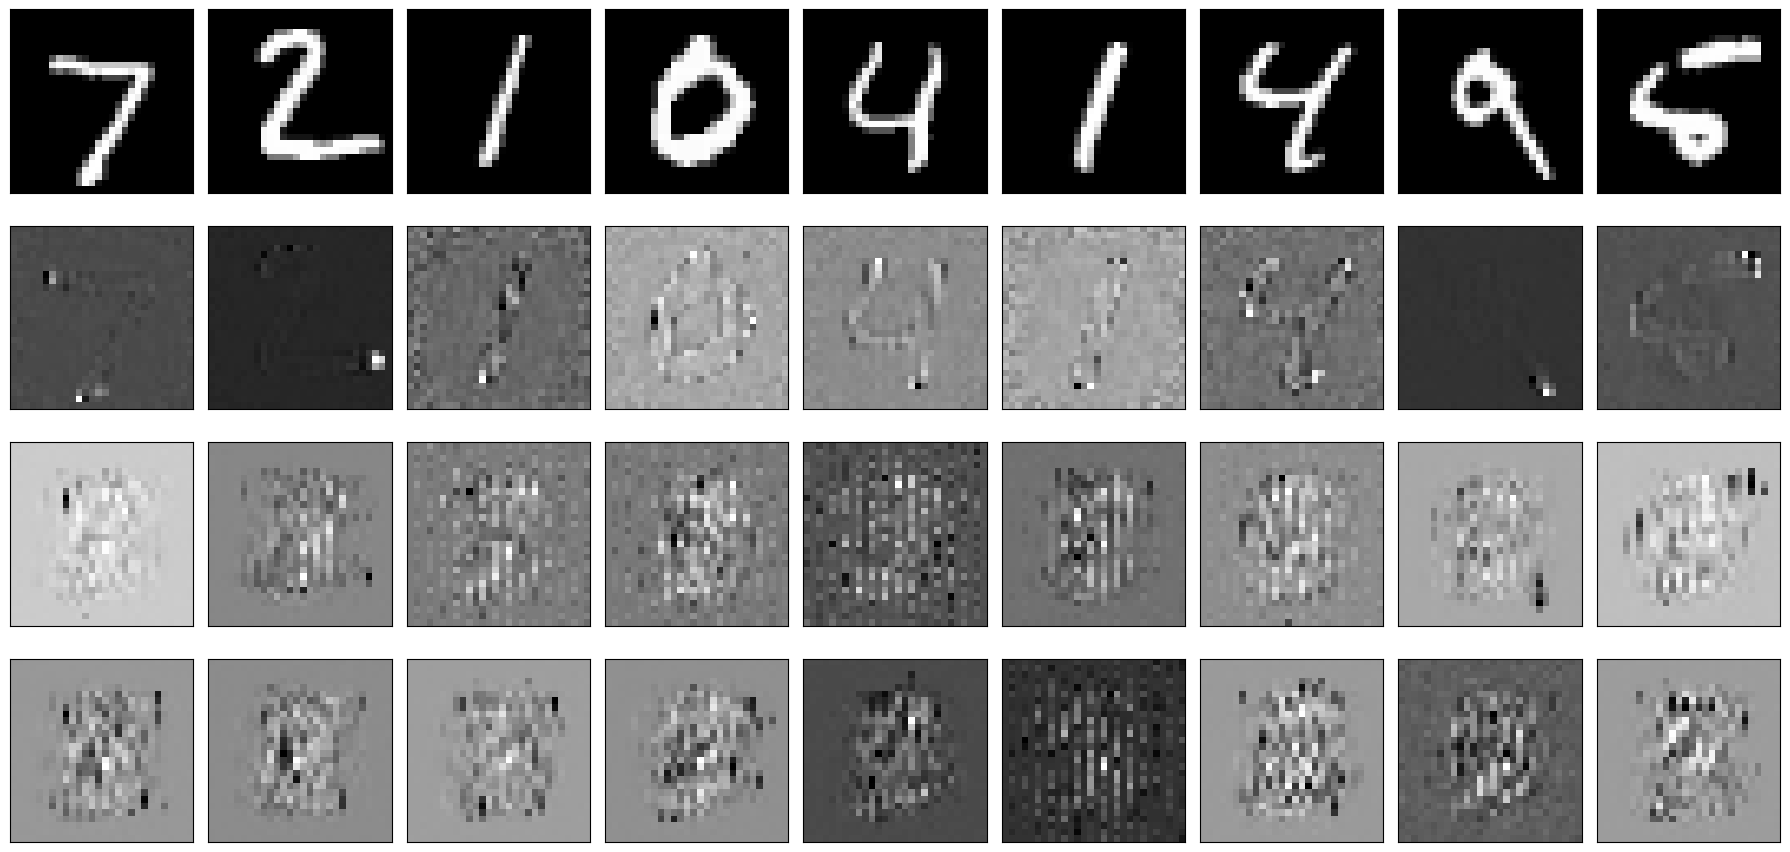

In [14]:
MODEL_ID: int = 6
print("model: ", f'./models/nice-{5 * MODEL_ID:03d}.pt')
model.load_state_dict(torch.load(f'./models/nice-{5 * MODEL_ID:03d}.pt', weights_only=True))
xx    = imgs + torch.rand_like(imgs) / 256
yy, log_loss = model(xx)
print("log likehood: ", log_loss.mean().detach().item())
zz    = model.inverse(yy)
ww    = model.sample(9)

print(model.scaling.S.sum())

fig, ax = plt.subplots(4, 9, figsize = (18, 9))
for i in range(9):
    ax[0, i].imshow(xx[i].reshape(28, 28).detach().numpy()  , 'gray')
    ax[1, i].imshow(  yy[i].reshape(28, 28).detach().numpy(), 'gray')
    ax[2, i].imshow(  zz[i].reshape(28, 28).detach().numpy(), 'gray')
    ax[3, i].imshow(  ww[i].reshape(28, 28).detach().numpy(), 'gray')

    ax[0, i].set_xticks([]); ax[0, i].set_yticks([])
    ax[1, i].set_xticks([]); ax[1, i].set_yticks([])
    ax[2, i].set_xticks([]); ax[2, i].set_yticks([])
    ax[3, i].set_xticks([]); ax[3, i].set_yticks([])

plt.tight_layout()
# fig.subplots_adjust(hspace = 0.001, wspace = 0.01, )
plt.show();

(array([2.000e+00, 0.000e+00, 4.000e+00, 1.100e+01, 7.100e+01, 6.790e+02,
        6.144e+03, 1.070e+02, 3.100e+01, 7.000e+00]),
 array([-83.18267059, -69.66503906, -56.1473999 , -42.62976456,
        -29.11213112, -15.59449577,  -2.0768609 ,  11.44077396,
         24.95840836,  38.4760437 ,  51.99367905]),
 <BarContainer object of 10 artists>)

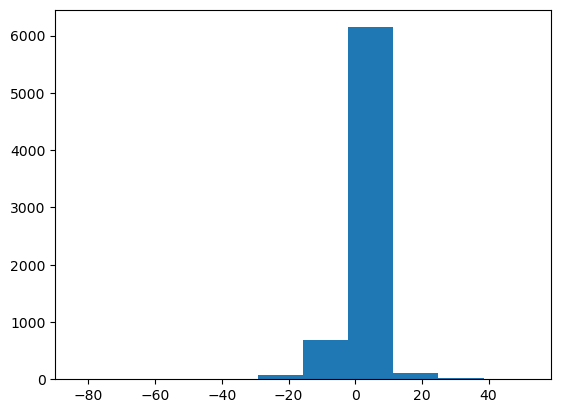

In [16]:
plt.hist(zz.flatten().detach())

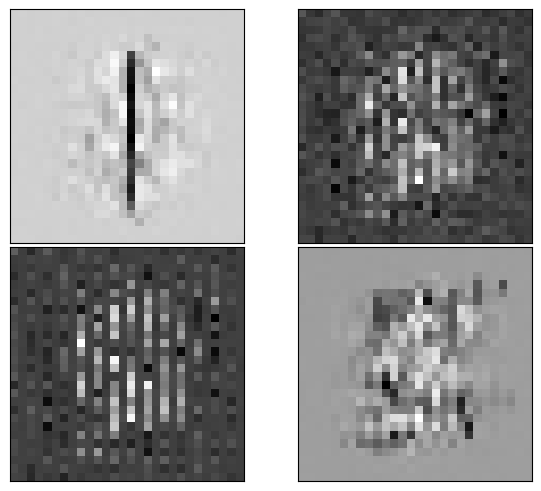

In [15]:
_, ax = plt.subplots(2, 2); ax = ax.flatten()
ax[0].imshow(model.inverse(torch.zeros([1, 28 * 28]))[0].detach().numpy().reshape([28, 28]), 'gray')
ax[1].imshow(model.inverse(torch.ones([1, 28 * 28]))[0].detach().numpy().reshape([28, 28]) , 'gray')
ax[2].imshow(model.inverse(torch.rand([1, 28 * 28]))[0].detach().numpy().reshape([28, 28]) , 'gray')
ax[3].imshow(model.inverse(torch.randn([1, 28 * 28]))[0].detach().numpy().reshape([28, 28]), 'gray')
for i in range(4):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout(w_pad=0.1, pad = 0.3)
